In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [52]:
transactionsDF = pd.read_csv("datasets\\transactions_train.csv")
transactionsDF.shape

(31788324, 5)

In [53]:
transactionsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [54]:
articlesDF = pd.read_csv("datasets\\articles.csv")
articlesDF.shape

(105542, 25)

In [5]:
# bestCust = transactionsDF['customer_id'].value_counts()[:500].index.tolist()

In [6]:
# minCustDF = transactionsDF.loc[transactionsDF["customer_id"].isin(bestCust)]
# minCustDF.shape

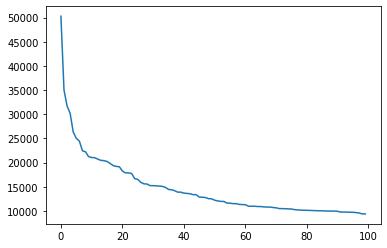

In [55]:
# Finding best articles to consider
bestArticleHash = {}
for aid in transactionsDF["article_id"]:
    if aid in bestArticleHash:
        bestArticleHash[aid] += 1
    else:
        bestArticleHash[aid] = 1
bestArticleList = [[item, bestArticleHash[item]] for item in bestArticleHash]
bestArticleList.sort(key=lambda x: x[1], reverse=True)
bestArticleCount = [item[1] for item in bestArticleList]
bestArticleIDs = [item[0] for item in bestArticleList]
plt.plot(bestArticleCount[:100])

In [56]:
# Selected top 20,000 articles which are bought by many customers and can be used to generate recommendations
pop_20K_id = bestArticleIDs[:5000]
pop_20K_count = bestArticleCount[:5000]

In [57]:
# Dropping transaction unrelated to popular articles
transactionsDF = transactionsDF[transactionsDF["article_id"].isin(pop_20K_id)]
transactionsDF.shape

(13697790, 5)

In [58]:
# Finding best customers to consider
bestCustHash = {}
for cid in transactionsDF["customer_id"]:
    if cid in bestCustHash:
        bestCustHash[cid] += 1
    else:
        bestCustHash[cid] = 1
bestCustList = [[item, bestCustHash[item]] for item in bestCustHash]
bestCustList.sort(key=lambda x: x[1], reverse=True)
bestCustCount = [item[1] for item in bestCustList]
bestCustIDs = [item[0] for item in bestCustList]

274


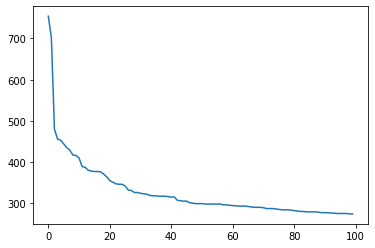

In [59]:
plt.plot(bestCustCount[:100])
print(min(bestCustCount[:100]))

In [60]:
# Selected top 500
best_500_id = bestCustIDs[:500]
best_500_count = bestCustCount[:500]

In [61]:
# Dropping transaction unrelated to regular customers
transactionsDF = transactionsDF[transactionsDF["customer_id"].isin(best_500_id)]
transactionsDF.reset_index()
transactionsDF.shape

(120421, 5)

In [14]:
# # Dropping duplicate entries by customers
# transactionsDF.drop(columns=["t_dat", "price", "sales_channel_id"], inplace=True)
# transactionsDF.drop_duplicates(inplace=True)
# transactionsDF.shape

(18745, 2)

In [62]:
# Dropping articlesData unrelated to popular articles
print(articlesDF.shape)
articlesDF = articlesDF[articlesDF["article_id"].isin(pop_20K_id)]
articlesDF.reset_index()
print(articlesDF.shape)

(105542, 25)
(5000, 25)


In [63]:

import copy
articlesCopy = copy.deepcopy(articlesDF)
print(articlesCopy['index_code'].head())
index_code = {"A": 14, "B": 10,"G": 11, "F": 12,"C": 13, "S": 5,"H": 6, "D": 7,"I": 8, "J": 9}
articlesCopy.replace({"index_code":index_code},inplace=True)
print(articlesCopy['index_code'].head())


0    A
1    A
6    B
8    B
9    B
Name: index_code, dtype: object
0    14
1    14
6    10
8    10
9    10
Name: index_code, dtype: int64


In [64]:
# Run only once. group no 26 missed to convert cat1 to cat 15
print(articlesCopy['index_group_no'].unique())
group_no = {1:1, 4:4, 3:3, 26:0,2:2}
articlesCopy.replace({"index_group_no":group_no},inplace=True)

[ 1  2  3  4 26]


In [65]:
print(articlesCopy['index_group_no'].unique())

[1 2 3 4 0]


In [66]:
processedCust = pd.DataFrame({'customer_id' : best_500_id})
processedCust['customer_id'] = processedCust['customer_id'].astype(dtype=pd.StringDtype())
for i in range(15):
    processedCust["cat_{}".format(i)]=0.0
processedCust.head()

,customer_id,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,cat_9,cat_10,cat_11,cat_12,cat_13,cat_14
0,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,d00063b94dcb1342869d4994844a2742b5d62927f36843...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0bf4c6fd4e9d33f9bfb807bb78348cbf5c565846ff4006...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ffc247b933f175b37fccbb4f71c0479d6625e703b36f63...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,03fdb0bf2d9ff8ba23e1b4aef53709119aad5bc83691d8...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
# Create mapping between article ID and self defined categories
mapping = {}
for idx, row in articlesCopy.iterrows():
    articleId = row['article_id']
    c1, c2 = row['index_group_no'], row['index_code']
    mapping[articleId] = [c1, c2]
cnt = 0
for item in mapping:
    cnt += 1
    print(item, " => ", mapping[item])
    if cnt == 5: break

108775015  =>  [1, 14]
108775044  =>  [1, 14]
111565001  =>  [1, 10]
111586001  =>  [1, 10]
111593001  =>  [1, 10]


In [98]:
# Removing 20 transactions from each customer
import random
removeSamples = 20
customer_to_article_map = {}
for idx, row in transactionsDF.iterrows():
    cust_id = row['customer_id']
    art_id = row['article_id']
    if cust_id not in customer_to_article_map:
        customer_to_article_map[cust_id] = [art_id]
    else:
        customer_to_article_map[cust_id].append(art_id)
customer_to_article_true = {}
debugCust = list(customer_to_article_map.keys())[0]
print(debugCust, " => ", len(customer_to_article_map[debugCust]))

# for item in customer_to_article_map:
#     customer_to_article_true[item] = []
#     for i in range(removeSamples):
#         customer_to_article_true[item].append(customer_to_article_map[item].pop(random.randrange(len(customer_to_article_map[item]))))

print(len(customer_to_article_map[debugCust]))
# print(customer_to_article_true[debugCust])
# Debug print

01e464bf74b13a55df22de1528eff2b33749c0cd92953b62bd22dee2de17d1fd  =>  256
256


In [30]:
print(i)

16


In [68]:
# Create feature vectors for each customer
featureHash = {}
for item in best_500_id:
    majCategory = [0 for i in range(5)]
    subCategory = [0 for i in range(10)]
    featureHash[item] = [majCategory, subCategory]

for idx, row in transactionsDF.iterrows():
    articleId = row['article_id']
    assert articleId in mapping,  "ArticleID [{}] not found".format(articleId)
    cust_id = row['customer_id']
    assert cust_id in featureHash,  "CustID [{}] not found".format(cust_id)
    cat1, cat2 = mapping[articleId]
    assert cat1 < 5, "cat1 failed: {}".format(cat1)
    assert 4 < cat2 < 15, "cat2 failed: {}".format(cat2)
    featureHash[cust_id][0][cat1] += 1
    featureHash[cust_id][1][cat2 - 5] += 1

for item in featureHash:
    newVec = []
    majSum = float(sum(featureHash[item][0]))
    minSum = float(sum(featureHash[item][1]))
    newVec.extend([x/majSum for x in featureHash[item][0]])
    newVec.extend([x/minSum for x in featureHash[item][1]])
    featureHash[item] = newVec

cnt = 0
for item in featureHash:
    cnt += 1
    print(item, " => ", featureHash[item])
    if cnt == 5: break

be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b  =>  [0.050397877984084884, 0.7851458885941645, 0.16180371352785147, 0.002652519893899204, 0.0, 0.050397877984084884, 0.0, 0.16180371352785147, 0.0, 0.0, 0.26657824933687, 0.0, 0.002652519893899204, 0.01856763925729443, 0.5]
d00063b94dcb1342869d4994844a2742b5d62927f36843164fb3f818f630bca9  =>  [0.002849002849002849, 0.1737891737891738, 0.8219373219373219, 0.0014245014245014246, 0.0, 0.002849002849002849, 0.0, 0.8219373219373219, 0.0, 0.0, 0.007122507122507123, 0.0, 0.0014245014245014246, 0.0, 0.16666666666666666]
0bf4c6fd4e9d33f9bfb807bb78348cbf5c565846ff4006acf5c1b9aea77b0e54  =>  [0.075, 0.7270833333333333, 0.19791666666666666, 0.0, 0.0, 0.075, 0.0, 0.19791666666666666, 0.0, 0.0, 0.1625, 0.0, 0.0, 0.008333333333333333, 0.55625]
ffc247b933f175b37fccbb4f71c0479d6625e703b36f637be643afc224a8977f  =>  [0.010964912280701754, 0.8092105263157895, 0.17982456140350878, 0.0, 0.0, 0.010964912280701754, 0.0, 0.17982456140350878, 0.0

In [22]:
featureHash

{'be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b': [377,
  592,
  122,
  2,
  0,
  38,
  0,
  122,
  0,
  0,
  201,
  0,
  2,
  14,
  38],
 'd00063b94dcb1342869d4994844a2742b5d62927f36843164fb3f818f630bca9': [117,
  122,
  577,
  1,
  0,
  2,
  0,
  577,
  0,
  0,
  5,
  0,
  1,
  0,
  2],
 '0bf4c6fd4e9d33f9bfb807bb78348cbf5c565846ff4006acf5c1b9aea77b0e54': [267,
  349,
  95,
  0,
  0,
  36,
  0,
  95,
  0,
  0,
  78,
  0,
  0,
  4,
  36],
 'ffc247b933f175b37fccbb4f71c0479d6625e703b36f637be643afc224a8977f': [281,
  369,
  82,
  0,
  0,
  5,
  0,
  82,
  0,
  0,
  80,
  0,
  0,
  8,
  5],
 '03fdb0bf2d9ff8ba23e1b4aef53709119aad5bc83691d89293a01a52b93d7370': [269,
  312,
  138,
  1,
  0,
  2,
  0,
  138,
  0,
  0,
  41,
  0,
  1,
  2,
  2],
 '30d1e9b6378a74a740f64c3d34f1686693d0430b03c6cd602d58062e604373d0': [275,
  330,
  100,
  0,
  0,
  14,
  0,
  100,
  0,
  0,
  50,
  0,
  0,
  5,
  14],
 'c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27cf9bda5517c8774f8fa': [216,
  31

In [29]:
# Modifying featureHash to reflect drop samples
for item in best_500_id:
    for remArt in customer_to_article_true[item]:
        i, j = mapping[remArt]
        featureHash[item][i] -= 1
        featureHash[item][j] -= 1

cnt = 0
for item in featureHash:
    cnt += 1
    print(item, " => ", featureHash[item])
    if cnt == 5: break

be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b  =>  [515, 748, 187, 2, 0, 47, 0, 187, 0, 0, 204, 0, 2, 29, 47]
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71  =>  [501, 565, 134, 7, 0, -1, 0, 134, 0, 0, 39, 0, 7, 25, -1]
0bf4c6fd4e9d33f9bfb807bb78348cbf5c565846ff4006acf5c1b9aea77b0e54  =>  [342, 424, 67, 0, 0, 51, 0, 67, 0, 0, 82, 0, 0, 0, 51]
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f  =>  [246, 286, 290, 9, 0, 7, 0, 290, 0, 0, 29, 0, 9, 11, 7]
30d1e9b6378a74a740f64c3d34f1686693d0430b03c6cd602d58062e604373d0  =>  [277, 352, 92, 0, 0, 20, 0, 92, 0, 0, 59, 0, 0, 16, 20]


In [69]:
# Updating feature vectors category wise into processedCust
for idx, row in processedCust.iterrows():
    cust_id = row['customer_id']
    for i in range(15):
        processedCust.at[idx, 'cat_{}'.format(i)] = featureHash[cust_id][i]
processedCust.head()

,customer_id,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,cat_9,cat_10,cat_11,cat_12,cat_13,cat_14
0,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,0.050398,0.785146,0.161804,0.002653,0.0,0.050398,0.0,0.161804,0.0,0.0,0.266578,0.0,0.002653,0.018568,0.500000
1,d00063b94dcb1342869d4994844a2742b5d62927f36843...,0.002849,0.173789,0.821937,0.001425,0.0,0.002849,0.0,0.821937,0.0,0.0,0.007123,0.0,0.001425,0.000000,0.166667
2,0bf4c6fd4e9d33f9bfb807bb78348cbf5c565846ff4006...,0.075000,0.727083,0.197917,0.000000,0.0,0.075000,0.0,0.197917,0.0,0.0,0.162500,0.0,0.000000,0.008333,0.556250
3,ffc247b933f175b37fccbb4f71c0479d6625e703b36f63...,0.010965,0.809211,0.179825,0.000000,0.0,0.010965,0.0,0.179825,0.0,0.0,0.175439,0.0,0.000000,0.017544,0.616228
4,03fdb0bf2d9ff8ba23e1b4aef53709119aad5bc83691d8...,0.004415,0.688742,0.304636,0.002208,0.0,0.004415,0.0,0.304636,0.0,0.0,0.090508,0.0,0.002208,0.004415,0.593819


In [70]:
processedCust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  500 non-null    string 
 1   cat_0        500 non-null    float64
 2   cat_1        500 non-null    float64
 3   cat_2        500 non-null    float64
 4   cat_3        500 non-null    float64
 5   cat_4        500 non-null    float64
 6   cat_5        500 non-null    float64
 7   cat_6        500 non-null    float64
 8   cat_7        500 non-null    float64
 9   cat_8        500 non-null    float64
 10  cat_9        500 non-null    float64
 11  cat_10       500 non-null    float64
 12  cat_11       500 non-null    float64
 13  cat_12       500 non-null    float64
 14  cat_13       500 non-null    float64
 15  cat_14       500 non-null    float64
dtypes: float64(15), string(1)
memory usage: 62.6 KB


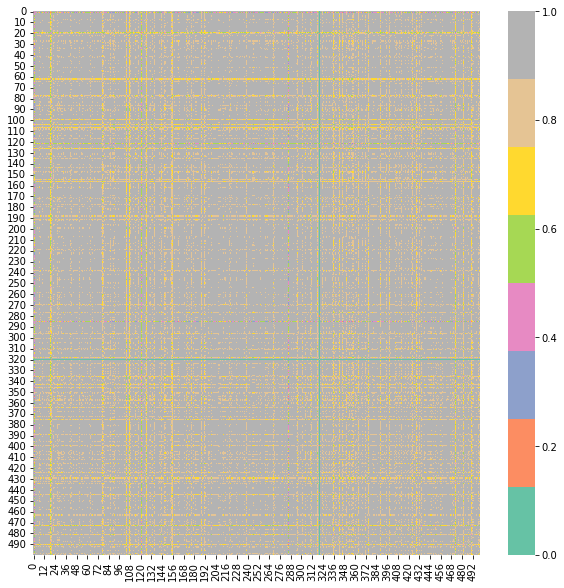

In [23]:
from sklearn.metrics.pairwise import cosine_similarity
processedCopy = copy.deepcopy(processedCust)
processedCopy.drop(columns=['customer_id'], inplace=True)
bla = cosine_similarity(processedCopy)
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(bla, cmap="Set2")
plt.show()

In [71]:
# Creating duplicate dataframes only for processing
processArticles = copy.deepcopy(articlesCopy)
processCustomers = copy.deepcopy(processedCust)

In [72]:
articlesCopy.shape

(5000, 25)

In [76]:
# # making articleIds name of indexes
# names = articlesCopy['article_id'].to_list()
# articlesCopy.index = names
# print(articlesCopy.head())
#
# # making customerIds name of indexes
# names = processedCust['customer_id'].to_list()
# processedCust.index = names
# print(processedCust.head())


           article_id  product_code          prod_name  product_type_no  \
108775015   108775015        108775          Strap top              253   
108775044   108775044        108775          Strap top              253   
110065001   110065001        110065  OP T-shirt (Idro)              306   
110065002   110065002        110065  OP T-shirt (Idro)              306   
110065011   110065011        110065  OP T-shirt (Idro)              306   

          product_type_name  product_group_name  graphical_appearance_no  \
108775015          Vest top  Garment Upper body                  1010016   
108775044          Vest top  Garment Upper body                  1010016   
110065001               Bra           Underwear                  1010016   
110065002               Bra           Underwear                  1010016   
110065011               Bra           Underwear                  1010016   

          graphical_appearance_name  colour_group_code colour_group_name  ...  \
108775015  

In [77]:
# # Dropping articleID and custID from dataframe for processing
# articlesCopy.drop(columns=['article_id'], inplace=True)
# processedCust.drop(columns=['customer_id'], inplace=True)

In [73]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')

In [74]:
# Dropping columns for model training
processArticles.drop(columns=["detail_desc", "prod_name", "product_type_name", "product_group_name", "graphical_appearance_name", "colour_group_name", "perceived_colour_value_name", "perceived_colour_master_name", "department_name", "index_name", "index_group_name", "section_name", "garment_group_name", "index_code"], inplace=True)

processCustomers.drop(columns=["customer_id"], inplace=True)


In [75]:
print(processArticles.info())
print(processCustomers.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 104553
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   article_id                  5000 non-null   int64
 1   product_code                5000 non-null   int64
 2   product_type_no             5000 non-null   int64
 3   graphical_appearance_no     5000 non-null   int64
 4   colour_group_code           5000 non-null   int64
 5   perceived_colour_value_id   5000 non-null   int64
 6   perceived_colour_master_id  5000 non-null   int64
 7   department_no               5000 non-null   int64
 8   index_group_no              5000 non-null   int64
 9   section_no                  5000 non-null   int64
 10  garment_group_no            5000 non-null   int64
dtypes: int64(11)
memory usage: 468.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column  Non-Null Cou

In [29]:
processArticles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 104553
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   article_id                  5000 non-null   int64
 1   product_code                5000 non-null   int64
 2   product_type_no             5000 non-null   int64
 3   graphical_appearance_no     5000 non-null   int64
 4   colour_group_code           5000 non-null   int64
 5   perceived_colour_value_id   5000 non-null   int64
 6   perceived_colour_master_id  5000 non-null   int64
 7   department_no               5000 non-null   int64
 8   index_group_no              5000 non-null   int64
 9   section_no                  5000 non-null   int64
 10  garment_group_no            5000 non-null   int64
dtypes: int64(11)
memory usage: 468.8 KB


In [76]:
# for i in range(15):
#     column = "cat_{}".format(i)
#     processCustomers[column] = processCustomers[column].astype('category')
processCustomers.info()
columns = ["article_id", "product_code", "product_type_no", "graphical_appearance_no", "colour_group_code", "perceived_colour_value_id", "perceived_colour_master_id", "department_no", "index_group_no", "section_no", "garment_group_no"]
for col in columns:
    processArticles[col] = processArticles[col].astype('category')
processArticles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cat_0   500 non-null    float64
 1   cat_1   500 non-null    float64
 2   cat_2   500 non-null    float64
 3   cat_3   500 non-null    float64
 4   cat_4   500 non-null    float64
 5   cat_5   500 non-null    float64
 6   cat_6   500 non-null    float64
 7   cat_7   500 non-null    float64
 8   cat_8   500 non-null    float64
 9   cat_9   500 non-null    float64
 10  cat_10  500 non-null    float64
 11  cat_11  500 non-null    float64
 12  cat_12  500 non-null    float64
 13  cat_13  500 non-null    float64
 14  cat_14  500 non-null    float64
dtypes: float64(15)
memory usage: 58.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 104553
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   

In [77]:
from sklearn.cluster import KMeans

km_model = KMeans(n_clusters=20)
op = km_model.fit_predict(processArticles)
articlesCopy['resCluster'] = op

In [89]:
articlesCopy = articlesCopy.reset_index(drop = True)
articlesCopy.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,resCluster
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,14,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,9
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,14,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,9
2,111565001,111565,20 den 1p Stockings,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,...,10,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo...",9
3,111586001,111586,Shape Up 30 den 1p Tights,273,Leggings/Tights,Garment Lower body,1010016,Solid,9,Black,...,10,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Tights with built-in support to lift the botto...,9
4,111593001,111593,Support 40 den 1p Tights,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,...,10,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny tights that shape the tummy, thighs...",9


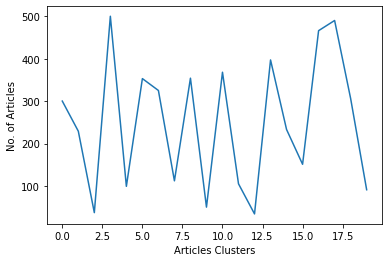

In [81]:
from collections import Counter
opcount = Counter(op)
plotList = []
for i in range(20):
    plotList.append(opcount[i])
# print(min(plotList))
plt.plot(plotList)
# plt.figure(figsize=(7, 21))
# plt.savefig("del.png")
plt.xlabel("Articles Clusters")
plt.ylabel("No. of Articles")
plt.show()

In [35]:
processCustomers.drop(columns=["resCluster"], inplace=True)

KeyError: "['resCluster'] not found in axis"

In [82]:
from sklearn.cluster import KMeans
km_model_cust = KMeans(n_clusters=10)
op2 = km_model_cust.fit_predict(processCustomers)
processedCust['resCluster'] = op2

35.40509371767041
0


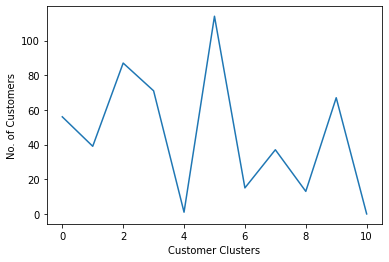

In [83]:
from collections import Counter
op2count = Counter(op2)
plotList = []
for i in range(11):
    plotList.append(op2count[i])
plt.plot(plotList)
import numpy as np
print(np.std(plotList))
print(min(plotList))
plt.xlabel("Customer Clusters")
plt.ylabel("No. of Customers")
plt.show()

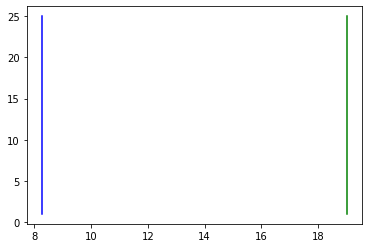

In [204]:
# only for ppt
from sklearn.cluster import KMeans
meanList = []
rangeList = []
for i in range(1, 26):
    km_model_cust = KMeans(n_clusters=i)
    tempOp = km_model_cust.fit_predict(processCustomers)
    count = Counter(tempOp)
    plotList = []
    for i in range(11):
        plotList.append(op2count[i])
    import numpy as np
    rangeList.append(max(plotList) - min(plotList))
    meanList.append(sum(plotList)/float(len(plotList)))
xaxis = [item for item in range(1, 26)]
plt.plot(meanList, xaxis, color='b')
plt.plot(rangeList, xaxis, color='g')
plt.show()


In [84]:
resClusterArticles = op
resClusterCust = op2
cluster_center_articles = km_model.cluster_centers_
cluster_center_customers = km_model_cust.cluster_centers_
cluster_center_articles.shape

(20, 11)

In [85]:
cluster_to_customer_map = {}
customer_to_cluster_map = {}

for idx, row in processedCust.iterrows():
    clusterNo = resClusterCust[idx]
    cust_id = row['customer_id']
    if clusterNo not in cluster_to_customer_map:
        cluster_to_customer_map[clusterNo] = []
    cluster_to_customer_map[clusterNo].append(cust_id)
    customer_to_cluster_map[cust_id] = clusterNo

cnt = 0
for item in cluster_to_customer_map:
    cnt += 1
    print(item, " => ", cluster_to_customer_map[item])
    if cnt == 5: break

5  =>  ['be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b', '0bf4c6fd4e9d33f9bfb807bb78348cbf5c565846ff4006acf5c1b9aea77b0e54', 'c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27cf9bda5517c8774f8fa', 'd190fc2dc41e27e5f79f8b1f58bfcd7a13ab22857f39ca9f1cd12230520d58ab', 'd7ccd94737524e3138287b27dc457b1dacd3737820e27f98019b8ba84d7ffcac', 'c3bbcf0011725dd1012eef2f6f16e28bc3d0eb2b25a4b7c9f4f98cf97821d83d', '6881f635c5be0550646522a81a07d942ee71fcf603397d7908b76b1df2298745', 'e7c0ff2f724293c09bf3ba498c8c49b001040374fab1cdf2d6fe6017de089eba', 'e238725cbff3774b711407cc000f42c0ddabf6b07eb0e311ffb5fc72e862a34b', '06d23b72cac134851a761473b40c881c300814981b6b0a3c4692ddf5a93f2a48', '6b47a05d1c6914c87331c2ec893dff5e5b071dcdc15427c01d68a21ff0e3b2ce', 'ae414fa70eb3c2ae0ec1640bbdf588531c8d034dfc5c06000e19601be6cd34fd', '7f0ac4394297dc4a885d3b9277ba526cbbfbf7fb7cae465b256ed8e55b864f03', 'e55d5ddb3a0c3fb1b4df8edbf526ba12989ab2a852c72774e3f3338cbbb3335e', 'd7951ef0b31959505d778831269ca5a549eaeb0

In [155]:
# # Rename indexes in articles copy
# cnt = 0
# for idx, row in articlesCopy.iterrows():
#     articlesCopy.rename(index={idx: cnt}, inplace=True)
#     cnt += 1


In [90]:
articlesCopy

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,resCluster
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,14,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,9
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,14,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.,9
2,111565001,111565,20 den 1p Stockings,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,...,10,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny nylon stockings with a wide, reinfo...",9
3,111586001,111586,Shape Up 30 den 1p Tights,273,Leggings/Tights,Garment Lower body,1010016,Solid,9,Black,...,10,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,Tights with built-in support to lift the botto...,9
4,111593001,111593,Support 40 den 1p Tights,304,Underwear Tights,Socks & Tights,1010016,Solid,9,Black,...,10,Lingeries/Tights,1,Ladieswear,62,"Womens Nightwear, Socks & Tigh",1021,Socks and Tights,"Semi shiny tights that shape the tummy, thighs...",9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,918292004,918292,STRONG HW seamless tights,273,Leggings/Tights,Garment Lower body,1010010,Melange,19,Greenish Khaki,...,5,Sport,0,Sport,5,Ladies H&M Sport,1005,Jersey Fancy,Sports tights in fast-drying functional fabric...,11
4996,918292011,918292,STRONG HW seamless tights,273,Leggings/Tights,Garment Lower body,1010010,Melange,10,White,...,5,Sport,0,Sport,5,Ladies H&M Sport,1005,Jersey Fancy,Sports tights in fast-drying functional fabric...,11
4997,918522001,918522,Jackie cable vest,252,Sweater,Garment Upper body,1010016,Solid,11,Off White,...,14,Ladieswear,1,Ladieswear,15,Womens Everyday Collection,1003,Knitwear,V-neck slipover in a soft cable knit with ribb...,11
4998,918547001,918547,GAUDI JERSEY SKIRT,275,Skirt,Garment Lower body,1010004,Check,9,Black,...,7,Divided,2,Divided,53,Divided Collection,1012,Skirts,"Short, fitted skirt in patterned jersey. High ...",11


In [91]:
print(len(resClusterArticles))
print(articlesCopy.shape)
test = []
for idx, row in articlesCopy.iterrows():
    # print(idx)
    # print(row)
    test.append(idx)
print(test[-1])

5000
(5000, 26)
4999


In [51]:
print(test)

[0, 1, 6, 8, 9, 10, 23, 27, 33, 51, 53, 57, 58, 59, 64, 65, 67, 68, 73, 74, 75, 77, 115, 117, 119, 121, 123, 125, 132, 137, 138, 141, 144, 160, 166, 167, 169, 170, 171, 175, 176, 177, 178, 186, 187, 189, 201, 206, 225, 226, 230, 231, 261, 269, 270, 285, 286, 287, 302, 319, 327, 328, 350, 364, 367, 368, 369, 370, 378, 386, 391, 399, 409, 426, 450, 451, 464, 494, 503, 504, 505, 506, 568, 598, 599, 622, 623, 658, 659, 814, 815, 851, 853, 854, 873, 882, 898, 906, 909, 943, 945, 958, 973, 974, 1000, 1042, 1067, 1072, 1073, 1081, 1113, 1158, 1179, 1229, 1252, 1292, 1300, 1320, 1354, 1425, 1433, 1469, 1474, 1475, 1476, 1477, 1478, 1480, 1481, 1482, 1487, 1492, 1512, 1513, 1526, 1527, 1535, 1536, 1552, 1553, 1569, 1675, 1679, 1698, 1713, 1714, 1715, 1722, 1723, 1730, 1731, 1732, 1780, 1781, 1798, 1901, 1902, 2040, 2059, 2071, 2118, 2119, 2131, 2137, 2139, 2140, 2178, 2181, 2188, 2192, 2193, 2194, 2195, 2196, 2197, 2199, 2200, 2201, 2202, 2208, 2209, 2210, 2212, 2213, 2215, 2218, 2219, 2220, 22

In [94]:
cluster_to_article_map = {}
article_to_cluster_map = {}
print(articlesCopy.shape)

for idx, row in articlesCopy.iterrows():
    clusterNo = resClusterArticles[idx]
    art_id = row['article_id']
    if clusterNo not in cluster_to_article_map:
        cluster_to_article_map[clusterNo] = []
    cluster_to_article_map[clusterNo].append(art_id)
    article_to_cluster_map[art_id] = clusterNo

cnt = 0
for item in cluster_to_article_map:
    cnt += 1
    print(item, " => ", cluster_to_article_map[item])
    if cnt == 5: break

(5000, 26)
9  =>  [108775015, 108775044, 111565001, 111586001, 111593001, 111609001, 120129001, 123173001, 129085001, 146730001, 148033001, 153115019, 153115020, 153115021, 156224002, 156227001, 156231001, 156231002, 158340001, 160442007, 160442010, 160442043, 179123001, 179208001, 179393001, 179950001, 179950017, 181448022, 182909001, 186262001, 186262006, 186264014, 186266004, 188183001, 188183015, 188183016, 188183020, 188183021, 188183022, 189616001, 189616006, 189616007, 189616008, 189626001, 189634001, 189654001, 190021003, 194037001, 200182001, 200182002]
2  =>  [201219001, 201219003, 212629004, 212629047, 212629048, 214844001, 214844002, 214844003, 215589001, 218829002, 220094001, 220094010, 224606019, 226959007, 228257001, 228257002, 228257003, 228257004, 233091021, 234432001, 235596002, 237347004, 237347036, 240561001, 243613004, 243937001, 244267032, 251510001, 253176016, 253448001, 253448002, 253448003, 262277011, 266875001, 266875006, 270381001, 270381003]
12  =>  [2788110

In [157]:
# tt = []
# for idx, row in articlesCopy.iterrows():
#     tt.append(idx)
# print(len(tt))
# print(min(tt))
# print(max(tt))

In [96]:
customer_to_article_map

NameError: name 'customer_to_article_map' is not defined

In [109]:
# Calculate n_recommendations
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
n_recom = 100
n_cust = 100  # <= total best customers
recommendations = []
for idx in range(n_cust):
    testCust = best_500_id[idx]
    # print("Test Cust: ", testCust)
    targetClusterCust = int(processedCust[processedCust['customer_id'] == testCust]['resCluster'])
    similarCustomers = cluster_to_customer_map[targetClusterCust]
    # print("Similar Customers: ", similarCustomers)
    unionArticles = []
    for tempCust in similarCustomers:
        unionArticles.extend(customer_to_article_map[tempCust])
    # print(len(unionArticles))
    unionArticles = list(set(unionArticles))
    # print(len(unionArticles))
    # print("Union: ", unionArticles)

    # get best article cluster to start searching
    voteMap = {}
    for testArt in unionArticles:
        art_cluster = article_to_cluster_map[testArt]
        if art_cluster in voteMap:
            voteMap[art_cluster] += 1
        else:
            voteMap[art_cluster] = 1
    # print(voteMap)
    voteList = [[item, voteMap[item]] for item in voteMap]
    voteList.sort(key=lambda x: x[1], reverse=True)
    bestArtCluster = voteList[0][0]
    # print(bestArtCluster)

    searchOrigin = cluster_center_articles[bestArtCluster]
    distances = []
    for testSearch in cluster_to_article_map[bestArtCluster]:
        testVec = processArticles[processArticles['article_id'] == testSearch]
        dist = cosine_similarity([searchOrigin], testVec)
        distances.append([testSearch, dist])

    distances.sort(key=lambda x:x[1], reverse=True)
    recommend = [item[0] for item in distances[:min(n_recom, len(distances))]]



    # distances = km_model.transform(processArticles)[:, bestArtCluster]
    # bestIndexes = np.argsort(distances)[::][:n_recom]
    # # print(bestIndexes)
    #
    # recommend = []
    # for rIdx in bestIndexes:
    #     # print ("Recommend idx: ", rIdx)
    #     recommend.append(articlesCopy.loc[rIdx]['article_id'])

    recommendations.append(recommend)

print(recommendations)




[[714384002, 714384007, 714384001, 714790001, 714790024, 714790003, 714790008, 714790020, 714790021, 714790017], [714384002, 714384007, 714384001, 714790001, 714790024, 714790003, 714790008, 714790020, 714790021, 714790017], [714384002, 714384007, 714384001, 714790001, 714790024, 714790003, 714790008, 714790020, 714790021, 714790017], [714384002, 714384007, 714384001, 714790001, 714790024, 714790003, 714790008, 714790020, 714790021, 714790017], [714384002, 714384007, 714384001, 714790001, 714790024, 714790003, 714790008, 714790020, 714790021, 714790017], [714384002, 714384007, 714384001, 714790001, 714790024, 714790003, 714790008, 714790020, 714790021, 714790017], [714384002, 714384007, 714384001, 714790001, 714790024, 714790003, 714790008, 714790020, 714790021, 714790017], [714384002, 714384007, 714384001, 714790001, 714790024, 714790003, 714790008, 714790020, 714790021, 714790017], [714384002, 714384007, 714384001, 714790001, 714790024, 714790003, 714790008, 714790020, 714790021, 714

In [111]:
targetCust = best_500_id[0]
res = []
tRes = []
for i in range(100):
    cnt = 0
    tot = 0
    allArt = customer_to_article_map[best_500_id[i]]
    for item in recommendations[i]:
        tot += 1
        if item in allArt:
            cnt += 1
    res.append(cnt)
    tRes.append(tot)
print(sum(res) / float(sum(tRes)))

0.075


In [113]:
p = [res[i]/float(tRes[i]) for i in range(len(res))]
print(p[:10])

[0.4, 0.0, 0.0, 0.1, 0.0, 0.6, 0.0, 0.0, 0.3, 0.1]


In [2]:
bla = [0.4, 0.0, 0.0, 0.1, 0.0, 0.6, 0.0, 0.0, 0.3, 0.1]
print(sum(bla))


1.5000000000000002


In [101]:
# Calculate n_recommendations
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def getRecommendations(n_recom, custList):
    recommendations = []
    for testCust in custList:
        # testCust = best_500_id[idx]
        # print("Test Cust: ", testCust)
        targetClusterCust = int(processedCust[processedCust['customer_id'] == testCust]['resCluster'])
        similarCustomers = cluster_to_customer_map[targetClusterCust]
        # print("Similar Customers: ", similarCustomers)
        unionArticles = []
        for tempCust in similarCustomers:
            unionArticles.extend(customer_to_article_map[tempCust])
        # print(len(unionArticles))
        unionArticles = list(set(unionArticles))
        # print(len(unionArticles))
        # print("Union: ", unionArticles)

        # get best article cluster to start searching
        voteMap = {}
        for testArt in unionArticles:
            art_cluster = article_to_cluster_map[testArt]
            if art_cluster in voteMap:
                voteMap[art_cluster] += 1
            else:
                voteMap[art_cluster] = 1
        # print(voteMap)
        voteList = [[item, voteMap[item]] for item in voteMap]
        voteList.sort(key=lambda x: x[1], reverse=True)
        bestArtCluster = voteList[0][0]
        # print(bestArtCluster)

        searchOrigin = cluster_center_articles[bestArtCluster]
        distances = []
        for testSearch in cluster_to_article_map[bestArtCluster]:
            testVec = processArticles[processArticles['article_id'] == testSearch]
            dist = cosine_similarity([searchOrigin], testVec)
            distances.append([testSearch, dist])

        distances.sort(key=lambda x:x[1], reverse=True)
        recommend = [item[0] for item in distances[:min(n_recom, len(distances))]]



        # distances = km_model.transform(processArticles)[:, bestArtCluster]
        # bestIndexes = np.argsort(distances)[::][:n_recom]
        # # print(bestIndexes)
        #
        # recommend = []
        # for rIdx in bestIndexes:
        #     # print ("Recommend idx: ", rIdx)
        #     recommend.append(articlesCopy.loc[rIdx]['article_id'])

        recommendations.append(recommend)

    return recommendations

In [67]:
similarCustomers

['be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b']

In [104]:
def evaluate(recommendations, custList):
    cnt = 0
    maxCorr = 0
    for i in range(len(custList)):
        tc = 0
        test = recommendations[i]
        ref = customer_to_article_true[best_500_id[i]]
        for item in test:
            if item in ref:
                cnt += 1
                tc += 1
        if tc > maxCorr:
            maxCorr = tc
    print("Total Correct: {}/{}".format(cnt, len(custList) * 20))
    print("Max individual Correct: {}/20".format(maxCorr))



In [150]:
recommendations = getRecommendations(100, cluster_to_customer_map[0])
evaluate(recommendations, cluster_to_customer_map[4])

Total Correct: 0/220
Max individual Correct: 0/20


In [128]:
articlesCopy[articlesCopy['article_id'] == 822789003].shape

(1, 26)

In [139]:
bla = np.zeros(20)
bla.reshape((-1,20))
bla.shape

(20,)

In [160]:
cnt = 0
tt = []
for i in range(100):
    tc = 0
    test = recommendations[i]
    ref = customer_to_article_true[best_500_id[i]]
    for item in test:
        if item in ref:
            cnt += 1
            tc += 1
    tt.append(tc)

print(cnt)



57


In [62]:
max(tt)

1

In [111]:
from sklearn.metrics import pairwise as pw
dir(pw)

['DataConversionWarning',
 'KERNEL_PARAMS',
 'PAIRED_DISTANCES',
 'PAIRWISE_BOOLEAN_FUNCTIONS',
 'PAIRWISE_DISTANCE_FUNCTIONS',
 'PAIRWISE_KERNEL_FUNCTIONS',
 'Parallel',
 '_NAN_METRICS',
 '_VALID_METRICS',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_argmin_min_reduce',
 '_check_chunk_size',
 '_chi2_kernel_fast',
 '_dist_wrapper',
 '_euclidean_distances',
 '_euclidean_distances_upcast',
 '_get_mask',
 '_num_samples',
 '_pairwise_callable',
 '_parallel_pairwise',
 '_precompute_metric_params',
 '_return_float_dtype',
 '_sparse_manhattan',
 'additive_chi2_kernel',
 'check_array',
 'check_non_negative',
 'check_paired_arrays',
 'check_pairwise_arrays',
 'chi2_kernel',
 'cosine_distances',
 'cosine_similarity',
 'csr_matrix',
 'delayed',
 'distance',
 'distance_metrics',
 'effective_n_jobs',
 'euclidean_distances',
 'gen_batches',
 'gen_even_slices',
 'get_chunk_n_rows',
 'haversine_distances',
 'is_scalar_nan',
 'issp

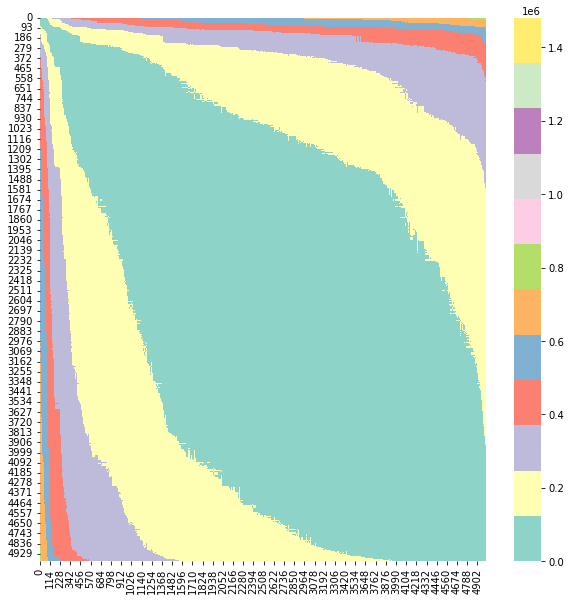

In [167]:
from sklearn.metrics.pairwise import manhattan_distances as distance
processedCopy = copy.deepcopy(processArticles)
processedCopy.drop(columns=['article_id'], inplace=True)
bla = distance(processedCopy)
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(bla, cmap="Set3")
plt.show()

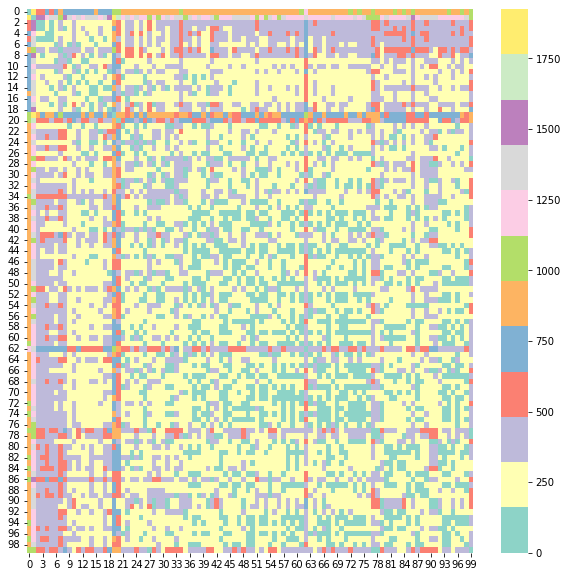

In [168]:
from sklearn.metrics.pairwise import manhattan_distances as distance
processedCopy = copy.deepcopy(processCustomers)
# processedCopy.drop(columns=['article_id'], inplace=True)
bla = distance(processedCopy)
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(bla, cmap="Set3")
plt.show()

In [177]:
for key in mapping:
    print (key, mapping[key])
    break


108775015 [1, 0]


In [178]:
# 111565001
bla = [0 for i in range(15)]
bla[1] = 1
bla[10] = 1
print ("ArticleId: {}\nFeatureVector: {}".format(111565001, bla))

ArticleId: 111565001
FeatureVector: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
